# JLab ML Challenge 4

This notebook takes a peek at the input data for ML Challenge 4. The data
is in the form of a single csv file with each line representing one event.
The line will contain all hits from the GlueX FCAL calorimeter from the event
with every 4 values representing the x,y,E,t values of the hit. Thus, each
line will have `N*4` values where `N` is the number of hits.

Since each line may have a different number of values, we first need to find
the maximum number of values for all lines. The total number of lines is
also probed.

In [1]:
import csv

datafile = '/work/halld2/home/davidl/2020.02.09.MLChallenge4/fcalhits_071743_002.csv'

# Find the maximum number of entries on a single line
num_rows = 0
max_columns = 0
with open(datafile) as csvfile:
    reader = csv.reader(csvfile)
    max_columns = max([len(row) for row in reader])
    num_rows = reader.line_num
    print('   Num. rows: '+ str(num_rows))
    print('Max. columns: ' + str(max_columns) + '  (=%d blocks hit)' % (max_columns/4))

   Num. rows: 207687
Max. columns: 376  (=94 blocks hit)


## Read into dataframe

Pandas dataframes expect the data to be well formatted into tables where there are 
exactly the same number of entries per row. If you don't tell it otherwise, it will
look at the first row and assume all subsequent rows will have the same number of 
columns. Here, we want to give it a list of column names so it will reserve space
enough to fit the row with the maximum number of columns.

In [2]:
import pandas as pd

colnames = []
Nhits = max_columns/4
for i in range (0, int(Nhits)):
    xnam = 'x%d' % i
    ynam = 'y%d' % i
    Enam = 'E%d' % i
    tnam = 't%d' % i
    colnames += [xnam, ynam, Enam, tnam]
print('defining ' + str(len(colnames)) + ' columns and reading into dataframe')
df = pd.read_csv(datafile, names=colnames)
df.head()

defining 376 columns and reading into dataframe


,x0,y0,E0,t0,x1,y1,E1,t1,x2,y2,...,E91,t91,x92,y92,E92,t92,x93,y93,E93,t93
0,8.0314,8.0314,0.015484,-1.76450,0.0000,16.0628,0.104652,-0.20200,4.0157,16.0628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32.1256,52.2041,0.207305,14.81670,32.1256,52.2041,0.033006,7.12921,36.1413,52.2041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0000,84.3297,0.291655,18.95290,4.0157,84.3297,0.027082,19.07070,12.0471,8.0314,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0157,-44.1727,0.077216,15.45570,8.0314,-44.1727,0.200318,15.45780,12.0471,-44.1727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40.1570,-60.2355,0.102078,9.81986,44.1727,-60.2355,0.047153,10.10440,36.1413,-56.2198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Some stats

First, we should print a few stats from the df. Run the `describe` method first with no arguments for a genral overview ...

In [3]:
df.describe()

,x0,y0,E0,t0,x1,y1,E1,t1,x2,y2,...,E91,t91,x92,y92,E92,t92,x93,y93,E93,t93
count,207687.000000,207687.000000,207687.000000,207687.000000,207687.000000,207687.000000,207687.000000,207687.000000,207645.000000,207645.000000,...,1.000000,1.00,1.0000,1.0000,1.000000,1.000,1.0000,1.0000,1.000000,1.000
mean,29.096508,20.896503,0.075292,-4.028240,23.959667,10.537746,0.098366,3.510331,20.263482,5.901434,...,0.041713,-111.15,-4.0157,12.0471,0.048918,-112.289,-20.0785,12.0471,0.034244,-114.708
std,31.900969,38.606334,0.163697,53.363032,34.430141,41.175788,0.200894,46.228755,37.233088,42.822722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-116.455000,-116.455000,0.000002,-126.985000,-116.455000,-116.455000,0.000002,-128.170000,-116.455000,-116.455000,...,0.041713,-111.15,-4.0157,12.0471,0.048918,-112.289,-20.0785,12.0471,0.034244,-114.708
25%,8.031400,4.015700,0.018625,-33.346300,4.015700,-8.031400,0.021218,-7.514500,4.015700,-16.062800,...,0.041713,-111.15,-4.0157,12.0471,0.048918,-112.289,-20.0785,12.0471,0.034244,-114.708
50%,16.062800,12.047100,0.032323,11.433600,16.062800,8.031400,0.037086,13.971300,12.047100,8.031400,...,0.041713,-111.15,-4.0157,12.0471,0.048918,-112.289,-20.0785,12.0471,0.034244,-114.708
75%,52.204100,44.172700,0.070863,23.579500,44.172700,32.125600,0.087755,23.185550,40.157000,28.109900,...,0.041713,-111.15,-4.0157,12.0471,0.048918,-112.289,-20.0785,12.0471,0.034244,-114.708
max,116.455000,116.455000,6.250620,118.006000,116.455000,116.455000,6.611010,115.975000,116.455000,116.455000,...,0.041713,-111.15,-4.0157,12.0471,0.048918,-112.289,-20.0785,12.0471,0.034244,-114.708


Now run for a couple of specific coulmns more in the middle of the list. A couple of observations on the table above and below:

1.) The min/max x and y values all look to be +/-116.455 which is the outer edge of the calorimeter. The beam hole is in the middle at x,y=0,0 and we would expect the x,y hits to be more or less evenly distributed azimuthally about the beam hole. There will be significantly more hits near the beam hole than at the outer edges.

2.) The actual order of the hits in the input list is not purposefully set to anything so it is left up to other factors like DAQ readout or possibly even memory address ordering during the data extraction. In other words, there may be an order to which hit is first and which is second etc., but it may have nothing to do with the actual values in the hit. The x0 mean above is 29cm to beam left while the other x values below look to be at increasing larger distances to beam right. The y-values don't show the  same pattern. This does not really mean anything, other than there may be something at least correlated with the values that determine the order of hits since if the ordering were completely random, we'd expect all of the means to be near 0.

3.) The standard deviations all tend to be around 35-45. Since these values are in cm and blocks are 4cm x 4cm, this equivalent to 9-11 blocks. The blocks are arranged roughly in a circular shape with a diameter of roughly 58 blocks. If we were to evenly distribute some region with hits, the standard deviation would be the width of the region over sqrt(12). Thus, the standard deviation of 9-11 blocks (lets call it 10) could be said to represent hits evenly distributed over 35 blocks. What does this mean? Not too much. Just that 35 blocks is not a lot smaller than 58 so one can assume the hits in say the 30th position aren't really crowded around a specific area of the calorimeter.

In [4]:
df[['x10', 'y10','x20', 'y20','x30', 'y30','x40', 'y40']].describe()

,x10,y10,x20,y20,x30,y30,x40,y40
count,179128.000000,179128.000000,97249.000000,97249.000000,40558.000000,40558.000000,12405.000000,12405.000000
mean,-1.510865,-2.829942,-15.180949,-3.476125,-24.616486,-2.603602,-30.084895,-1.398456
std,44.354657,44.419713,42.560068,45.130231,37.555731,45.268536,32.868629,45.178421
min,-116.455000,-116.455000,-116.455000,-116.455000,-116.455000,-116.455000,-116.455000,-116.455000
25%,-28.109900,-28.109900,-44.172700,-32.125600,-48.188400,-36.141300,-52.204100,-36.141300
50%,-4.015700,-4.015700,-16.062800,-4.015700,-24.094200,0.000000,-28.109900,4.015700
75%,28.109900,24.094200,8.031400,28.109900,-8.031400,28.109900,-12.047100,32.125600
max,116.455000,116.455000,116.455000,116.455000,116.455000,116.455000,116.455000,116.455000


In [5]:
df[['E10','E20','E30','E40', 't10', 't20', 't30', 't40']].describe()

,E10,E20,E30,E40,t10,t20,t30,t40
count,179128.000000,9.724900e+04,40558.000000,12405.000000,179128.000000,97249.000000,40558.000000,12405.000000
mean,0.124490,1.191446e-01,0.106754,0.096133,9.717807,12.613265,13.353269,14.357695
std,0.278097,2.767179e-01,0.231658,0.208030,35.826308,33.820679,33.059365,32.247286
min,0.000002,4.368990e-07,0.000035,0.000070,-127.611000,-127.137000,-125.369000,-123.485000
25%,0.023971,2.428450e-02,0.024472,0.024499,5.896360,11.191700,12.533800,13.194900
50%,0.043490,4.256940e-02,0.041417,0.040254,15.971600,17.532700,17.842400,18.002000
75%,0.104728,9.936260e-02,0.091825,0.082496,22.108300,22.549500,22.376125,22.115900
max,7.732060,7.082470e+00,4.597660,3.759470,116.130000,113.054000,111.742000,109.603000


### Plot some values

Below we plot some values to give us a visual. Note that this takes a few seconds to plot since it runs over the dat multiple times.

In the top row, the reason for the varied means in x/y becomes more obvious. It is due to some regions of the detector being excluded from that row. There is still a wide enough region illuminated to keep the standard deviations high.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f251b8a6240>,
      dtype=object)

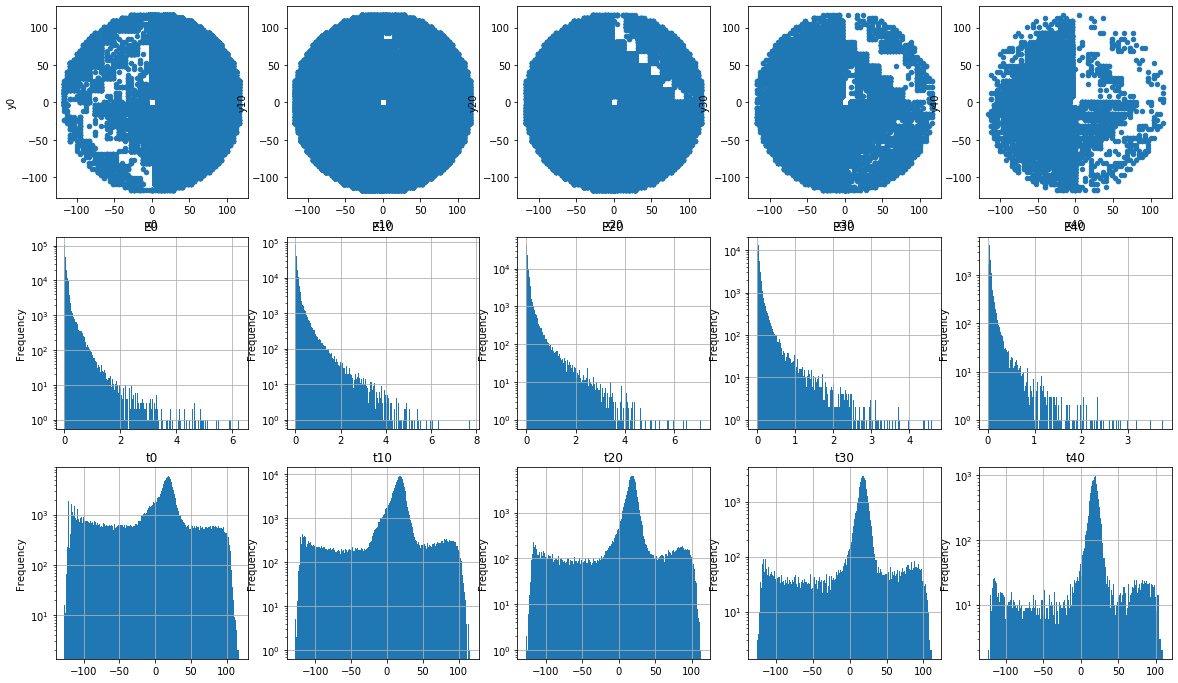

In [53]:
import matplotlib.pyplot as plt

# create subplot figure with multiple plots
fig, axes = plt.subplots(nrows=3,ncols=5,figsize=(20,12))

df.plot.scatter('x0', 'y0', ax=axes[0,0])
df.plot.scatter('x10', 'y10', ax=axes[0,1])
df.plot.scatter('x20', 'y20', ax=axes[0,2])
df.plot.scatter('x30', 'y30', ax=axes[0,3])
df.plot.scatter('x40', 'y40', ax=axes[0,4])
df['E0'].plot.hist(ax=axes[1,0], grid=True, logy=True, bins=200, title='E0')
df['E10'].plot.hist(ax=axes[1,1], grid=True, logy=True, bins=200, title='E10')
df['E20'].plot.hist(ax=axes[1,2], grid=True, logy=True, bins=200, title='E20')
df['E30'].plot.hist(ax=axes[1,3], grid=True, logy=True, bins=200, title='E30')
df['E40'].plot.hist(ax=axes[1,4], grid=True, logy=True, bins=200, title='E40')
df['t0'].plot.hist(ax=axes[2,0], grid=True, logy=True, bins=200, title='t0')
df['t10'].plot.hist(ax=axes[2,1], grid=True, logy=True, bins=200, title='t10')
df['t20'].plot.hist(ax=axes[2,2], grid=True, logy=True, bins=200, title='t20')
df['t30'].plot.hist(ax=axes[2,3], grid=True, logy=True, bins=200, title='t30')
df['t40'].plot.hist(ax=axes[2,4], grid=True, logy=True, bins=200, title='t40')
display(axes)

### Plot some single events

Plot a few events. This is a little complicated since we have to pull all of the non-NaN x values and y-values for a single row of the dataframe into separate lists and then plot them using 2-D histogram. We just plot whether a cell is hit or not here and don't use the energy in coloring. It looks like there is some variation of color, likely due to one block having more than one hit in the event, separated by time.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2522071f98>,
      dtype=object)

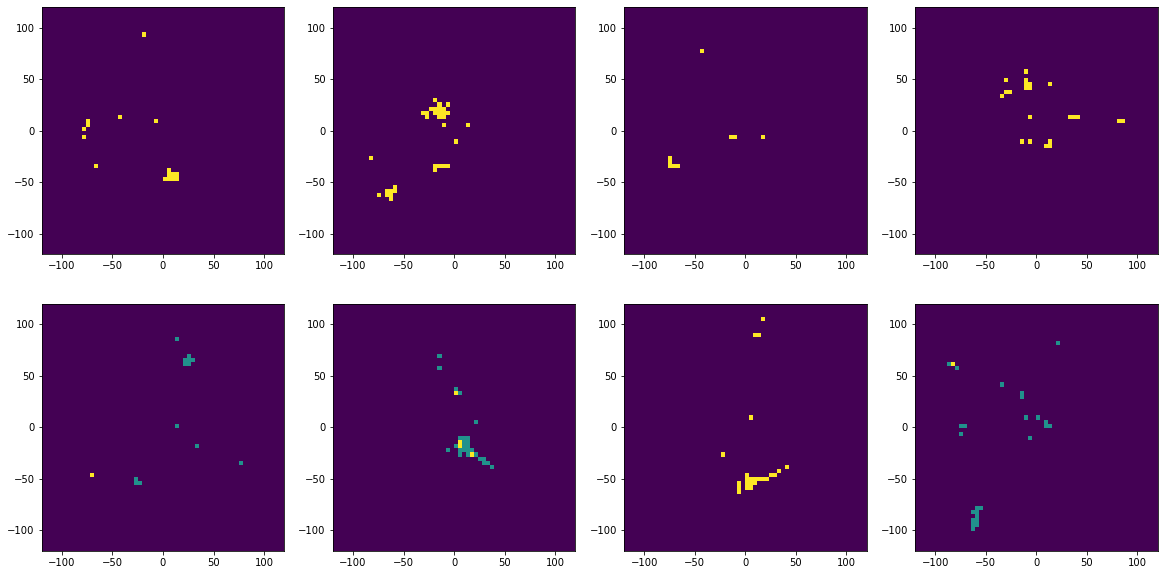

In [63]:
import numpy as np
import matplotlib

fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(20,10))

# Get column names for all x and y columns
xcols = [colname for colname in df.columns if colname.startswith('x')]
ycols = [colname for colname in df.columns if colname.startswith('y')]

# Specify some random events
myevents = [3,27,102,214,337, 516, 814, 1024]

# Loop over events, drawing them into subplots
for ievent in range(0, len(myevents)):
    # Slice single row (=event) from dataframe and capture all non-NaN x,y values in lists
    mdf = df.iloc[[myevents[ievent]]]
    xvals = [x for x in mdf[xcols].values[0] if not np.isnan(x)]
    yvals = [y for y in mdf[ycols].values[0] if not np.isnan(y)]
    ix = int(ievent/4)
    iy = int(ievent%4)
    h = axes[ix,iy].hist2d(xvals, yvals, bins=60, range=[[-120.0, 120.0], [-120.0, 120.0]])
    
display(axes)